## Librerias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import KNNImputer, IterativeImputer
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import mean_absolute_error, mean_squared_error
from scipy.stats import shapiro, ks_2samp, ttest_ind, mannwhitneyu

## Cargar Dataset

In [ ]:
url = "https://raw.githubusercontent.com/Kalbam/Datos/main/base_imputacion_mixta_1000.csv"
df = pd.read_csv(url)

df.head()

,fecha,sexo,ciudad,nivel_educativo,segmento,estado_civil,edad,altura_cm,ingresos,gasto_mensual,puntuacion_credito,demanda
0,2024-01-01,F,Medellín,NaN,B,Unión libre,19.0,161.821754,3574.753806,1832.731832,640.465372,119.202995
1,2024-01-02,F,Barranquilla,NaN,B,NaN,52.0,167.819566,3163.626815,NaN,533.108430,124.457874
2,2024-01-03,M,Bogotá,Secundaria,B,Soltero/a,38.0,165.756219,2765.672259,1219.535074,491.016910,NaN
3,2024-01-04,F,Bogotá,NaN,B,Casado/a,57.0,160.642670,4320.397345,1908.324816,NaN,129.426792
4,2024-01-05,M,Cali,Técnico,B,Soltero/a,67.0,151.402909,NaN,1887.385697,610.213994,133.916319


## Exploracion de Variables

In [ ]:
df.info()
df.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   fecha               1000 non-null   object 
 1   sexo                980 non-null    object 
 2   ciudad              950 non-null    object 
 3   nivel_educativo     900 non-null    object 
 4   segmento            800 non-null    object 
 5   estado_civil        650 non-null    object 
 6   edad                970 non-null    float64
 7   altura_cm           920 non-null    float64
 8   ingresos            880 non-null    float64
 9   gasto_mensual       750 non-null    float64
 10  puntuacion_credito  500 non-null    float64
 11  demanda             850 non-null    float64
dtypes: float64(6), object(6)
memory usage: 93.9+ KB


,fecha,sexo,ciudad,nivel_educativo,segmento,estado_civil,edad,altura_cm,ingresos,gasto_mensual,puntuacion_credito,demanda
count,1000,980,950,900,800,650,970.000000,920.000000,880.000000,750.000000,500.000000,850.000000
unique,1000,2,5,4,3,4,NaN,NaN,NaN,NaN,NaN,NaN
top,2026-09-26,F,Bogotá,Secundaria,B,Soltero/a,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,518,307,317,457,290,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,42.861856,167.760096,3681.294745,1687.810749,599.077500,160.305759
std,NaN,NaN,NaN,NaN,NaN,NaN,14.621382,9.275530,1079.326096,582.070174,79.828186,25.357794
min,NaN,NaN,NaN,NaN,NaN,NaN,18.000000,140.000000,487.662547,100.000000,373.657944,99.875828
25%,NaN,NaN,NaN,NaN,NaN,NaN,30.000000,161.488768,2999.416229,1309.239768,544.467843,139.505538
50%,NaN,NaN,NaN,NaN,NaN,NaN,43.000000,167.714614,3669.620507,1676.193764,599.692595,160.721251
75%,NaN,NaN,NaN,NaN,NaN,NaN,55.000000,173.999069,4375.093656,2063.260990,653.345068,181.100754


## Identificacion de Variables

In [ ]:
cualitativas = df.select_dtypes(include=["object"]).columns.tolist()
cuantitativas = df.select_dtypes(include=[np.number]).columns.tolist()

print("Cualitativas:", cualitativas)
print("Cuantitativas:", cuantitativas)

Cualitativas: ['fecha', 'sexo', 'ciudad', 'nivel_educativo', 'segmento', 'estado_civil']
Cuantitativas: ['edad', 'altura_cm', 'ingresos', 'gasto_mensual', 'puntuacion_credito', 'demanda']


## Detección de valores faltantes

In [ ]:
faltantes = df.isnull().sum()
faltantes_pct = 100 * df.isnull().mean()
tabla_faltantes = pd.DataFrame({
    "faltantes": faltantes,
    "%": faltantes_pct
})
print(tabla_faltantes)

                    faltantes     %
fecha                       0   0.0
sexo                       20   2.0
ciudad                     50   5.0
nivel_educativo           100  10.0
segmento                  200  20.0
estado_civil              350  35.0
edad                       30   3.0
altura_cm                  80   8.0
ingresos                  120  12.0
gasto_mensual             250  25.0
puntuacion_credito        500  50.0
demanda                   150  15.0


## Grafico de barras

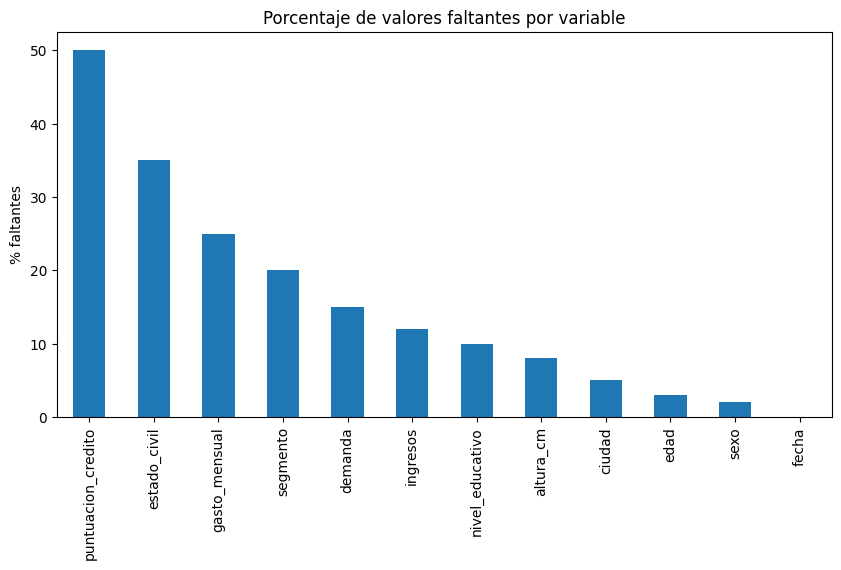

In [ ]:
plt.figure(figsize=(10,5))
faltantes_pct.sort_values(ascending=False).plot(kind="bar")
plt.title("Porcentaje de valores faltantes por variable")
plt.ylabel("% faltantes")
plt.show()

## Mapa de calor de valores faltantes

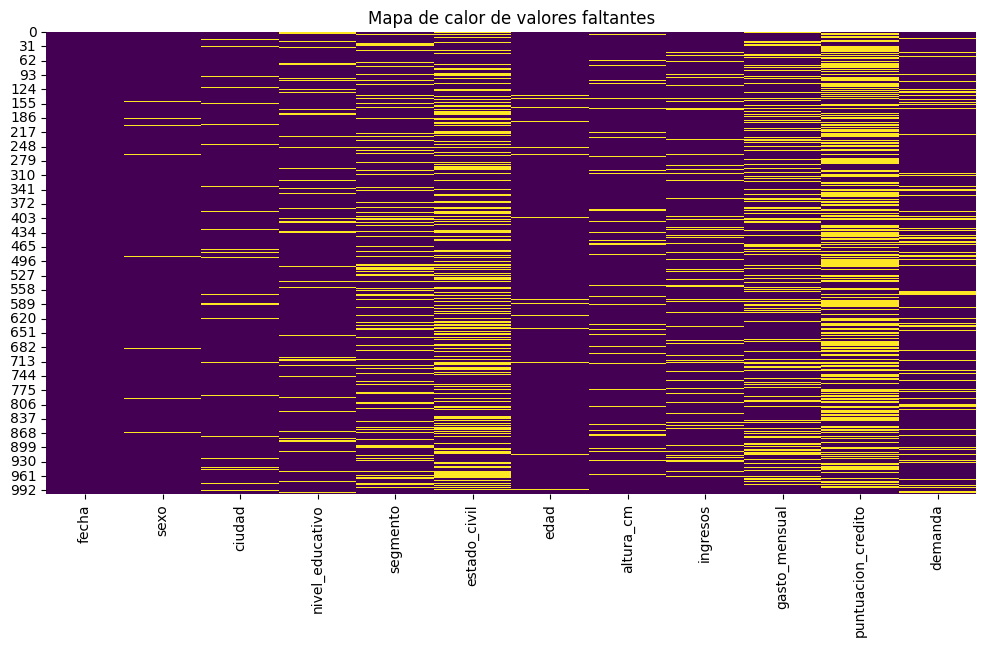

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Mapa de calor de valores faltantes")
plt.show()

## Clasificación de tipo de ausencia

In [ ]:
tipo_ausencia = {}
for col in df.columns:
    if faltantes[col] == 0:
        tipo_ausencia[col] = "No aplica"
    elif faltantes_pct[col] < 5:
        tipo_ausencia[col] = "MCAR"
    elif 5 <= faltantes_pct[col] < 20:
        tipo_ausencia[col] = "MAR"
    else:
        tipo_ausencia[col] = "MNAR"

print(tipo_ausencia)

{'fecha': 'No aplica', 'sexo': 'MCAR', 'ciudad': 'MAR', 'nivel_educativo': 'MAR', 'segmento': 'MNAR', 'estado_civil': 'MNAR', 'edad': 'MCAR', 'altura_cm': 'MAR', 'ingresos': 'MAR', 'gasto_mensual': 'MNAR', 'puntuacion_credito': 'MNAR', 'demanda': 'MAR'}


## Discusión sobre imputabilidad

In [ ]:
discusion = pd.DataFrame({
    "variable": df.columns,
    "%_faltantes": faltantes_pct.values,
    "tipo_ausencia": [tipo_ausencia[c] for c in df.columns],
    "riesgo_imputacion": ["medio" if tipo_ausencia[c]=="MAR" else "alto" if tipo_ausencia[c]=="MNAR" else "bajo" for c in df.columns],
    "metodo_sugerido": ["media/mediana" if c in cuantitativas else "moda" for c in df.columns]
})
discusion

,variable,%_faltantes,tipo_ausencia,riesgo_imputacion,metodo_sugerido
0,fecha,0.0,No aplica,bajo,moda
1,sexo,2.0,MCAR,bajo,moda
2,ciudad,5.0,MAR,medio,moda
3,nivel_educativo,10.0,MAR,medio,moda
4,segmento,20.0,MNAR,alto,moda
5,estado_civil,35.0,MNAR,alto,moda
6,edad,3.0,MCAR,bajo,media/mediana
7,altura_cm,8.0,MAR,medio,media/mediana
8,ingresos,12.0,MAR,medio,media/mediana
9,gasto_mensual,25.0,MNAR,alto,media/mediana


##  Imputaciones numéricas

In [ ]:
num_cols = df[cuantitativas]

In [ ]:
# Media
df_num_mean = df.copy()
df_num_mean[num_cols.columns] = num_cols.fillna(num_cols.mean())

# Mediana
df_num_median = df.copy()
df_num_median[num_cols.columns] = num_cols.fillna(num_cols.median())

# KNN
knn_imp = KNNImputer(n_neighbors=5)
df_num_knn = df.copy()
df_num_knn[num_cols.columns] = knn_imp.fit_transform(num_cols)

# Iterative Imputer con BayesianRidge
iter_imp = IterativeImputer(estimator=BayesianRidge(), random_state=0)
df_num_iter = df.copy()
df_num_iter[num_cols.columns] = iter_imp.fit_transform(num_cols)

c:\Users\mateo\miniconda3\envs\ml_lihki\lib\site-packages\sklearn\impute\_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


## Imputaciones categóricas

In [ ]:
cat_cols = df[cualitativas]

In [ ]:
# Moda
df_categ_mode = df.copy()
for col in cualitativas:
    moda = df[col].mode(dropna=True)[0]
    df_categ_mode[col] = df[col].fillna(moda)

# Hot-deck simple (usar muestreo aleatorio de valores no nulos)
df_categ_hotdeck = df.copy()
for col in cualitativas:
    valores = df[col].dropna()
    df_categ_hotdeck[col] = df[col].apply(lambda x: np.random.choice(valores) if pd.isnull(x) else x)

# KNN para categóricas (con Label Encoding)
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
encoders = {}
for col in cualitativas:
    le = LabelEncoder()
    df_encoded[col] = df_encoded[col].astype(str)
    df_encoded[col] = le.fit_transform(df_encoded[col])
    encoders[col] = le

knn_categ = KNNImputer(n_neighbors=5)
df_knn_categ = pd.DataFrame(knn_categ.fit_transform(df_encoded), columns=df_encoded.columns)
for col in cualitativas:
    le = encoders[col]
    df_knn_categ[col] = df_knn_categ[col].round().astype(int)
    df_knn_categ[col] = le.inverse_transform(df_knn_categ[col])

## Imputacion de series

In [ ]:
df_time = df.copy()
df_time["fecha"] = pd.to_datetime(df_time["fecha"])
df_time = df_time.set_index("fecha")

df_time_ffill = df_time.fillna(method="ffill")
df_time_bfill = df_time.fillna(method="bfill")
df_time_interp = df_time.interpolate(method="linear")

C:\Users\mateo\AppData\Local\Temp\ipykernel_19560\1582559107.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_time_ffill = df_time.fillna(method="ffill")
C:\Users\mateo\AppData\Local\Temp\ipykernel_19560\1582559107.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_time_bfill = df_time.fillna(method="bfill")
C:\Users\mateo\AppData\Local\Temp\ipykernel_19560\1582559107.py:7: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_time_interp = df_time.interpolate(method="linear")


## Gráficos comparativos numéricas

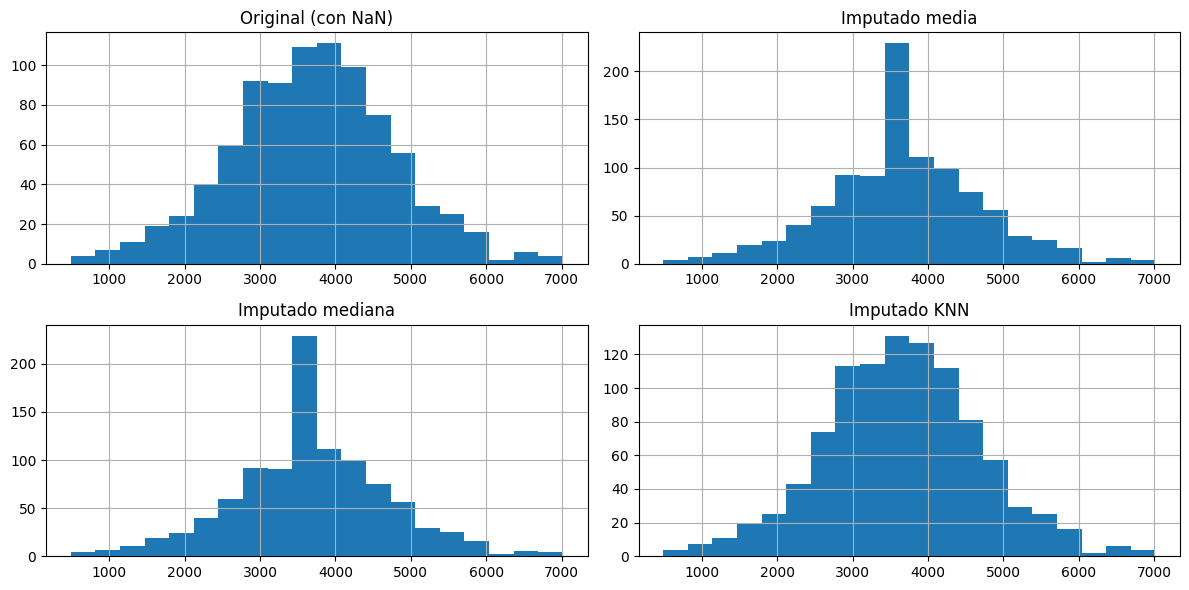

In [ ]:
col = "ingresos"

plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
df[col].hist(bins=20)
plt.title("Original (con NaN)")

plt.subplot(2,2,2)
df_num_mean[col].hist(bins=20)
plt.title("Imputado media")

plt.subplot(2,2,3)
df_num_median[col].hist(bins=20)
plt.title("Imputado mediana")

plt.subplot(2,2,4)
df_num_knn[col].hist(bins=20)
plt.title("Imputado KNN")

plt.tight_layout()
plt.show()

## Gráficos categóricas

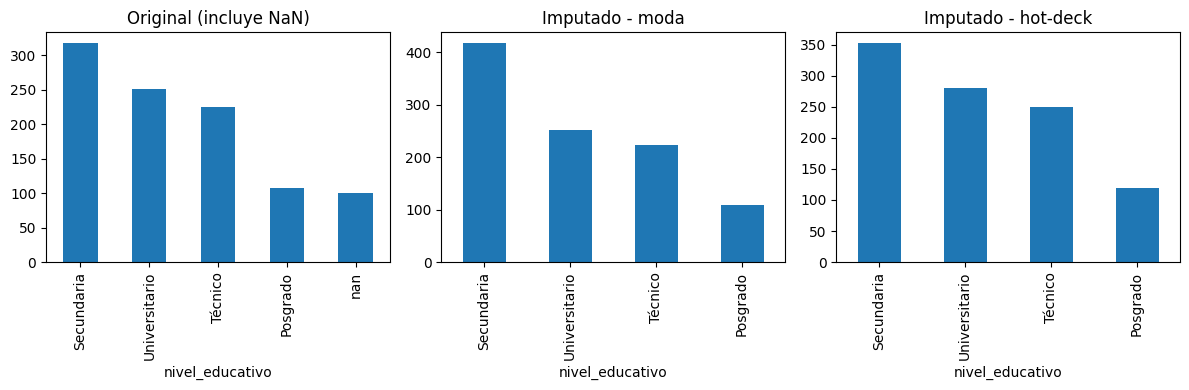

In [ ]:
col = "nivel_educativo"

plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
df[col].value_counts(dropna=False).plot(kind="bar")
plt.title("Original (incluye NaN)")

plt.subplot(1,3,2)
df_categ_mode[col].value_counts().plot(kind="bar")
plt.title("Imputado - moda")

plt.subplot(1,3,3)
df_categ_hotdeck[col].value_counts().plot(kind="bar")
plt.title("Imputado - hot-deck")

plt.tight_layout()
plt.show()

## Gráficos series temporales

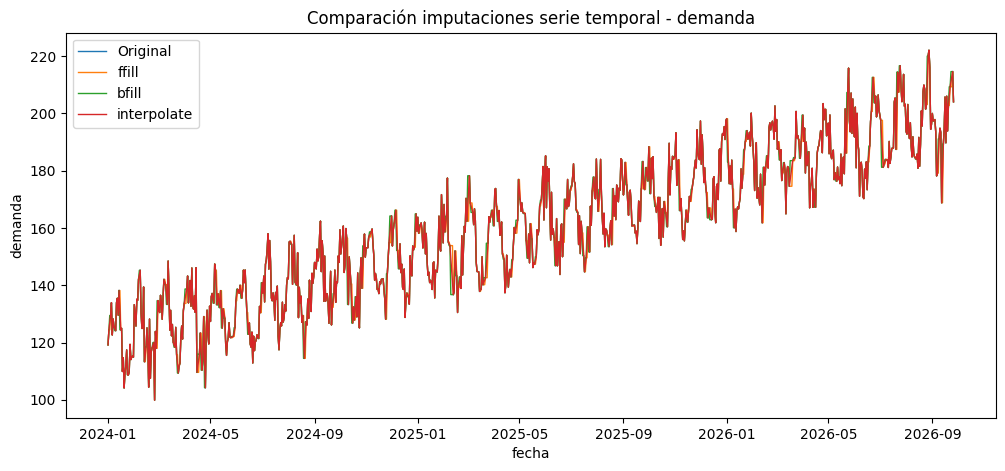

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(df_time["demanda"], label="Original", linewidth=1)
plt.plot(df_time_ffill["demanda"], label="ffill", linewidth=1)
plt.plot(df_time_bfill["demanda"], label="bfill", linewidth=1)
plt.plot(df_time_interp["demanda"], label="interpolate", linewidth=1)
plt.legend()
plt.title("Comparación imputaciones serie temporal - demanda")
plt.xlabel("fecha")
plt.ylabel("demanda")
plt.show()

## Evaluación estadística

In [ ]:
resumen_eval = []
for col in cuantitativas:
    obs = df[col].dropna()
    if len(obs) == 0: continue

    # Normalidad
    stat, p_sh = shapiro(obs)
    normal = p_sh > 0.05

    # Comparar imputaciones (media como ejemplo)
    imputados = df_num_mean.loc[df[col].isnull(), col]
    if len(imputados) > 0:
        stat_ks, p_ks = ks_2samp(obs, imputados)
        if normal:
            stat_test, p_test = ttest_ind(obs, imputados, equal_var=False)
            test_used = "t-test"
        else:
            stat_test, p_test = mannwhitneyu(obs, imputados)
            test_used = "Mann-Whitney"
        resumen_eval.append([col, normal, p_sh, p_ks, test_used, p_test])

resumen_eval = pd.DataFrame(resumen_eval, columns=["variable","normal","p_shapiro","p_ks","test","p_valor"])
resumen_eval

c:\Users\mateo\miniconda3\envs\ml_lihki\lib\site-packages\scipy\stats\_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


,variable,normal,p_shapiro,p_ks,test,p_valor
0,edad,False,1.132185e-15,1.340747e-07,Mann-Whitney,0.817478
1,altura_cm,True,5.911472e-01,1.338285e-17,t-test,1.000000
2,ingresos,True,3.244752e-01,5.477614e-25,t-test,1.000000
3,gasto_mensual,True,6.752081e-01,1.100156e-44,t-test,1.000000
4,puntuacion_credito,True,9.405074e-01,3.933574e-58,t-test,1.000000
5,demanda,False,1.129628e-07,2.550749e-30,Mann-Whitney,0.853906


## Resumen Final

In [ ]:
resumen_final = pd.DataFrame({
    "variable": df.columns,
    "%_nulos": faltantes_pct.values,
    "tipo_ausencia": [tipo_ausencia[c] for c in df.columns],
    "metodo_sugerido": ["media/mediana" if c in cuantitativas else "moda" for c in df.columns]
})

resumen_final.to_csv("resumen_imputacion.csv", index=False)
print("Resumen guardado en resumen_imputacion.csv")
resumen_final

Resumen guardado en resumen_imputacion.csv


,variable,%_nulos,tipo_ausencia,metodo_sugerido
0,fecha,0.0,No aplica,moda
1,sexo,2.0,MCAR,moda
2,ciudad,5.0,MAR,moda
3,nivel_educativo,10.0,MAR,moda
4,segmento,20.0,MNAR,moda
5,estado_civil,35.0,MNAR,moda
6,edad,3.0,MCAR,media/mediana
7,altura_cm,8.0,MAR,media/mediana
8,ingresos,12.0,MAR,media/mediana
9,gasto_mensual,25.0,MNAR,media/mediana
